# The parameters used for comparison in this project are:

In [110]:
# 1) Strike rates by phases
# 2) Ratios of their strike rates when compared with that of other batter's
# 3) Ratios of their strike rates when compared with that of other batter's - by phases
# 4) Strike rates against top three wicket takers of their respective seasons
# 5) Percentage of team's runs scored
# 6) Dot balls percentage
# 7) Mean runs scored in different innings
# 8) Ratios of their strike rates when compared with that of other batter's - at home
# 9) Mean runs scored at home

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

pd.set_option("display.expand_frame_repr", None) #Displays DataFrames to Stretch Pages
pd.set_option("display.max_colwidth", None) #Displays maximum column width

df = pd.read_csv("IPL_data_new.csv")
df = df[(df["innings"] == 1) | (df["innings"] == 2)]

df["wides"] = df["wides"].fillna(0)
df["noballs"] = df["noballs"].fillna(0)
df["byes"] = df["byes"].fillna(0)
df["legbyes"] = df["legbyes"].fillna(0)
df["penalty"] = df["penalty"].fillna(0)
df=df[df["wides"]==0]
df["player_dismissed"] = df["player_dismissed"].fillna(0)

# Note: Wide deliveries have been filtered out of the dataset

In [112]:
#sdf - shubman data frame
#vdf - virat data frame

vdf = df[df["striker"]=="V Kohli"]
sdf = df[df["striker"]=="Shubman Gill"]

vdf = vdf[vdf["season"]==2016]
sdf = sdf[sdf["season"]==2023]

# 1) Kohli and Shubman's strike rates by phases

In [113]:
# extracting their data frame for powerplay numbers

sdf_pp = sdf[sdf["ball"]<7.1]
vdf_pp = vdf[vdf["ball"]<7.1]

In [114]:
# extracting their data frame for slog overs numbers

sdf_slog = sdf[sdf["ball"]>=16.1]
vdf_slog = vdf[vdf["ball"]>=16.1]

In [115]:
# extracting their data frame for middle over numbers

sdf_middle = sdf[(sdf["ball"]<16.1) & (sdf["ball"]>=7.1)]
vdf_middle = vdf[(vdf["ball"]<16.1) & (vdf["ball"]>=7.1)]

In [116]:
#total runs in the season

shubman_runs = sdf["runs_off_bat"].sum()
kohli_runs = vdf["runs_off_bat"].sum()

In [117]:
#runs in powerplay (spr = shubman powerplay runs)

spr = sum(sdf_pp["runs_off_bat"])
vpr = sum(vdf_pp["runs_off_bat"])

In [118]:
#runs in slog overs (ssr = shubman slog overs runs)

ssr = sum(sdf_slog["runs_off_bat"])
vsr = sum(vdf_slog["runs_off_bat"])

In [119]:
#runs in middle overs (smr = shubman middle overs runs)

smr = sum(sdf_middle["runs_off_bat"])
vmr = sum(vdf_middle["runs_off_bat"])

In [120]:
#spb = shubman powerplay balls
spb=len(sdf_pp)
vpb=len(vdf_pp)
#smb = shubman middle overs balls
smb=len(sdf_middle)
vmb=len(vdf_middle)
#ssb = shubman slog overs balls
ssb=len(sdf_slog)
vsb=len(vdf_slog)

#spsr = shubman powerplay strike rate
#smsr = shubman middle overs strike rate
#sssr = shubman slog overs strike rate
spsr = 100*spr/spb
smsr = 100*smr/smb
sssr = 100*ssr/ssb

vpsr = 100*vpr/vpb
vmsr = 100*vmr/vmb
vssr = 100*vsr/vsb

phases = ('PowerPlay', 'Middle Overs', 'Slog Overs')

virat_strikerates = [vpsr,vmsr,vssr]
shubman_strikerates = [spsr,smsr,sssr]

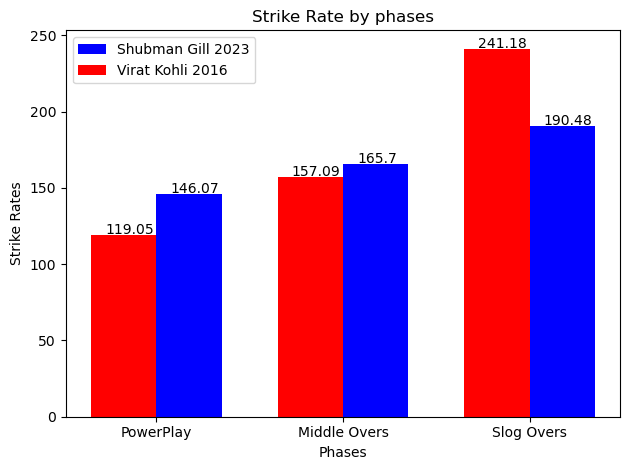

In [121]:
#getting the data ready for plotting

shubman_strikerates=[round(e,2) for e in shubman_strikerates]
virat_strikerates=[round(e,2) for e in virat_strikerates]

fig, ax = plt.subplots()
bar_width = 0.35
x = np.arange(3)

p1 = plt.bar(x+bar_width,shubman_strikerates,bar_width,color="b",label="Shubman Gill 2023")
p2 = plt.bar(x,virat_strikerates,bar_width,color="r",label="Virat Kohli 2016")

plt.xlabel("Phases")
plt.ylabel("Strike Rates")
plt.title("Strike Rate by phases")
plt.xticks(x + (bar_width/2) , phases)
plt.legend()
plt.tight_layout()

for i, v in enumerate(shubman_strikerates):
    plt.text(i+0.25,v+0.6,str(v))

for i, v in enumerate(virat_strikerates):
    plt.text(i-0.1,v+0.6,str(v))
 
plt.show()

# 2) Ratios of their strike rates when compared with that of other batter's

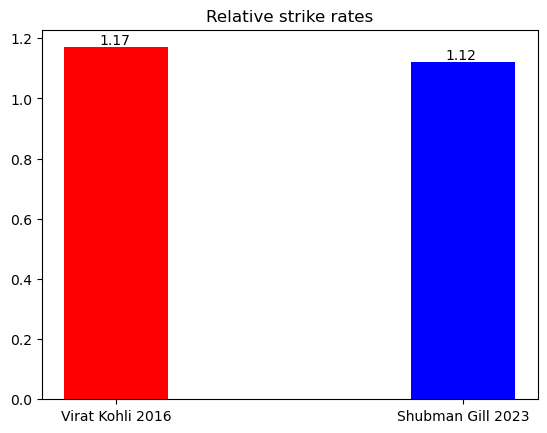

In [122]:
#extracting data frame for overall seasons - 2016 and 2023
df_2016 = df[df["season"]==2016]
df_2023 = df[df["season"]==2023]

#extracting data frame and numbers for all batters except Virat Kohli
df_notkohli = df_2016[df_2016["striker"]!="V Kohli"]
df_notkohli_runs = df_notkohli["runs_off_bat"].sum()
df_notkohli_balls = len(df_notkohli)

notkohli_sr = df_notkohli_runs*100/df_notkohli_balls

#Virat Kohli's strike rate and the all important ratio
kohli_sr = vdf["runs_off_bat"].sum() / len(vdf)
kohli_sr*=100
kohli_sr_ratio = kohli_sr/notkohli_sr

#extracting data frame and numbers for all batters except Shubman Gill
df_notshubman = df_2023[df_2023["striker"]!="Shubman Gill"]
df_notshubman_runs = df_notshubman["runs_off_bat"].sum()
df_notshubman_balls = len(df_notshubman)

#Shubman Gill's strike rate and the all important ratio
notshubman_sr = df_notshubman_runs*100 / df_notshubman_balls
shubman_sr = sdf["runs_off_bat"].sum() *100 / len(sdf)
shubman_sr_ratio = shubman_sr / notshubman_sr

#plotting the data
c=['red','blue']
ratios = [round(kohli_sr_ratio,2),round(shubman_sr_ratio,2)]
players = ["Virat Kohli 2016", "Shubman Gill 2023"]
plt.bar(players,ratios, width=0.3, color =c)
plt.title("Relative strike rates")

for i, v in enumerate(ratios):
    plt.text(i-0.05,v+0.01,str(v))

# 3) Ratios of their SRs when compared with that of other batter's - by phases

In [123]:
#extracting the data frames for all batters except Kohli and Gill - by phases (pp=powerplay)

df_notkohli_pp = df_notkohli[df_notkohli["ball"]<6.1]
df_notkohli_middle = df_notkohli[(df_notkohli["ball"]>=6.1) | (df_notkohli["ball"]<16.1)]
df_notkohli_slog = df_notkohli[df_notkohli["ball"]>=16.1]

df_notshubman_pp = df_notshubman[df_notshubman["ball"]<6.1]
df_notshubman_middle = df_notshubman[(df_notshubman["ball"]>=6.1) | (df_notshubman["ball"]<16.1)]
df_notshubman_slog = df_notshubman[df_notshubman["ball"]>=16.1]

#calculating the strike rates for all batters except Kohli and Gill - by phases (pp=powerplay) (sr=strike rate)
df_notkohli_pp_sr = df_notkohli_pp["runs_off_bat"].sum() *100/ len(df_notkohli_pp)
df_notkohli_middle_sr = df_notkohli_middle["runs_off_bat"].sum() *100/ len(df_notkohli_middle)
df_notkohli_slog_sr = df_notkohli_slog["runs_off_bat"].sum() *100/ len(df_notkohli_slog)

df_notshubman_pp_sr = df_notshubman_pp["runs_off_bat"].sum() *100/ len(df_notshubman_pp)
df_notshubman_middle_sr = df_notshubman_middle["runs_off_bat"].sum() *100/ len(df_notshubman_middle)
df_notshubman_slog_sr = df_notshubman_slog["runs_off_bat"].sum() *100/ len(df_notshubman_slog)

#finding the ratio of our batter's strike rate to that of rest of the batters
kohli_pp_ratio = vpsr / df_notkohli_pp_sr
kohli_middle_ratio = vmsr / df_notkohli_middle_sr
kohli_slog_ratio = vssr / df_notkohli_slog_sr

shubman_pp_ratio = spsr / df_notshubman_pp_sr
shubman_middle_ratio = smsr / df_notshubman_middle_sr
shubman_slog_ratio = sssr / df_notshubman_slog_sr

shubman_phase_sr_ratios = [round(shubman_pp_ratio,2), round(shubman_middle_ratio,2), round(shubman_slog_ratio,2)]
virat_phase_sr_ratios = [round(kohli_pp_ratio,2), round(kohli_middle_ratio,2), round(kohli_slog_ratio,2)]

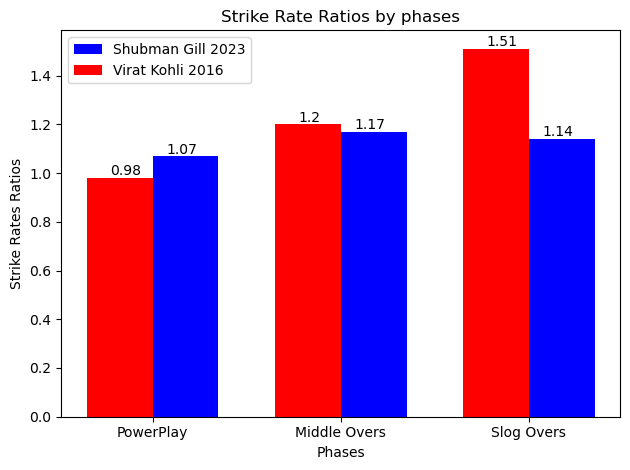

In [124]:
#getting the data ready for plotting
fig, ax = plt.subplots()
bar_width = 0.35
x = np.arange(3)

p1 = plt.bar(x+bar_width,shubman_phase_sr_ratios,bar_width,color="b",label="Shubman Gill 2023")
p2 = plt.bar(x,virat_phase_sr_ratios,bar_width,color="r",label="Virat Kohli 2016")

plt.xlabel("Phases")
plt.ylabel("Strike Rates Ratios")
plt.title("Strike Rate Ratios by phases")
plt.xticks(x + (bar_width/2) , phases)
plt.legend()
plt.tight_layout()

for i, v in enumerate(shubman_phase_sr_ratios):
    plt.text(i+0.25,v+0.01,str(v))

for i, v in enumerate(virat_phase_sr_ratios):
    plt.text(i-0.05,v+0.01,str(v))

plt.show()

# 4) Strike rates against top three wicket takers of their respective seasons

In [125]:
#tbvk = top bowlers (highest wicket takers) virat kohli faced in 2016 
tbvk = vdf[(vdf["bowler"]=="B Kumar") | (vdf["bowler"]=="DS Kulkarni") | (vdf["bowler"]=="Mustafizur Rahman")]
tbvk1 = pd.DataFrame(tbvk.groupby("bowler")["runs_off_bat"].sum()).reset_index()
tbvk2 = pd.DataFrame(tbvk.groupby("bowler")["ball"].count()).reset_index()

tbvk3 = tbvk1.merge(tbvk2, on="bowler", how="left")

tbvk3["strike_rate"] = tbvk3["runs_off_bat"]*100/tbvk3["ball"]

tbvk_dism = tbvk[tbvk["player_dismissed"] == "V Kohli"]
tbvk4 = pd.DataFrame(tbvk_dism.groupby("bowler")["player_dismissed"].count()).reset_index()

tbvk5 = tbvk3.merge(tbvk4, on="bowler", how="left")
tbvk5["player_dismissed"] = tbvk5["player_dismissed"].fillna(0)

In [126]:
#tbsg = top bowlers (highest wicket takers) shubman gill faced in 2016 
tbsg = sdf[(sdf["bowler"]=="PP Chawla") | (sdf["bowler"]=="YS Chahal") | (sdf["bowler"]=="TU Deshpande")]

tbsg1 = pd.DataFrame(tbsg.groupby("bowler")["runs_off_bat"].sum()).reset_index()
tbsg2 = pd.DataFrame(tbsg.groupby("bowler")["ball"].count()).reset_index()
tbsg3 = tbsg1.merge(tbsg2, on="bowler", how="left")

tbsg3["strike_rate"] = tbsg3["runs_off_bat"]*100/tbsg3["ball"]

tbsg_dism = tbsg[tbsg["player_dismissed"] == "Shubman Gill"]
tbsg4 = pd.DataFrame(tbsg_dism.groupby("bowler")["player_dismissed"].count()).reset_index()

tbsg5 = tbsg3.merge(tbsg4, on="bowler", how="left")
tbsg5["player_dismissed"] = tbsg5["player_dismissed"].fillna(0)

# Number of wickets : Bhuvaneshwar - 23 | Kulkarni - 18 | Mustafizur - 17

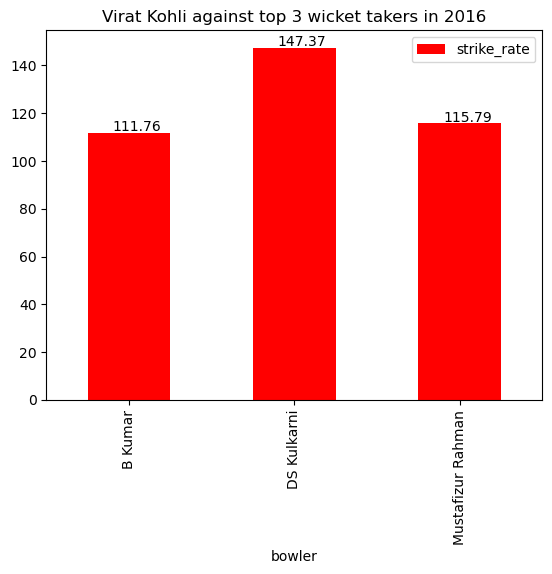

In [127]:
tbvk5.plot(kind="bar", x = "bowler", y = "strike_rate", color = "r")
plt.title("Virat Kohli against top 3 wicket takers in 2016")
for i, v in enumerate(round(tbvk5.strike_rate,2)):
    plt.text(i-0.1,v+0.65,str(v))

# Number of wickets : Chawla - 22 | Chahal - 21 | Deshpande - 21

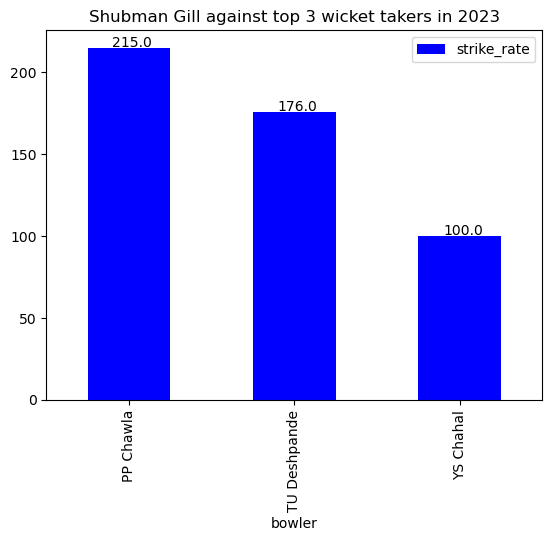

In [128]:
tbsg5.plot(kind="bar", x = "bowler", y = "strike_rate", color = "b")
plt.title("Shubman Gill against top 3 wicket takers in 2023")
for i, v in enumerate(tbsg5.strike_rate):
    plt.text(i-0.1,v+0.65,str(v))

# 5) Percentage of team's runs scored

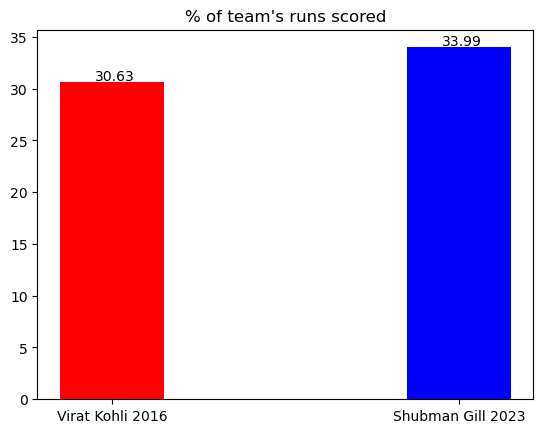

In [129]:
#total runs scored by their respective teams in the season
rcb_runs = df_2016[df_2016["batting_team"]=="Royal Challengers Bangalore"]["runs_off_bat"].sum()
gt_runs = df_2023[df_2023["batting_team"]=="Gujarat Titans"]["runs_off_bat"].sum()

#finding their contribution
shubman_team_contri = shubman_runs *100/ gt_runs
kohli_team_contri = kohli_runs *100/ rcb_runs

#plotting the data
c=['red','blue']
runs_contribution = [round(shubman_team_contri,2), round(kohli_team_contri,2)]
plt.bar(players,runs_contribution,color=c,width=0.3)
plt.title("% of team's runs scored")

for i, v in enumerate(runs_contribution):
    plt.text(i-0.05,v+0.15,str(v))
    
plt.show()

# 6) Dot balls percentage

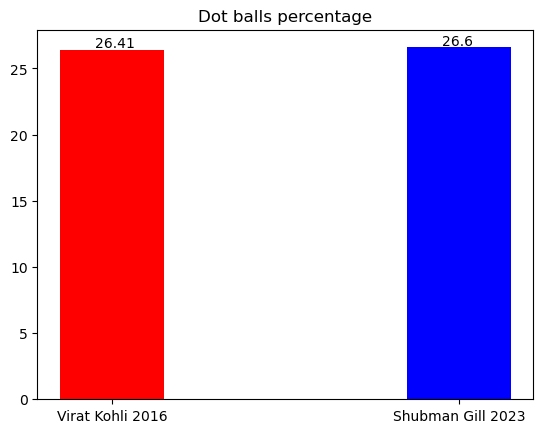

In [130]:
dot_perc_kohli = len(vdf[vdf['runs_off_bat']==0]) *100 / len(vdf)
dot_perc_gill = len(sdf[sdf['runs_off_bat']==0]) *100 / len(sdf)

c=['red','blue']
dot_perc = [round(dot_perc_kohli,2),round(dot_perc_gill,2)]
plt.bar(players,dot_perc,color=c,width=0.3)
plt.title("Dot balls percentage")

for i, v in enumerate(dot_perc):
    plt.text(i-0.05,v+0.15,str(v))
    
plt.show()

# 7) Mean runs (not average) scored in different innings

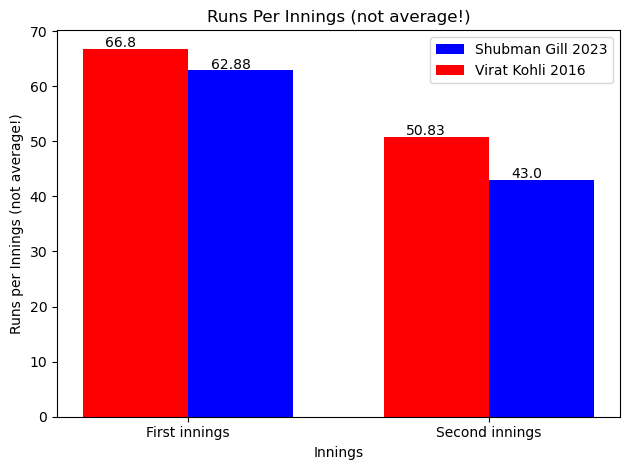

In [131]:
#vdf1 = virat's data frame for first innings
#vdf2 = virat's data frame for second innings
#sdf1 = shubman's data frame for first innings
#sdf2 = shubman's data frame for second innings

vdf1 = vdf[vdf["innings"]==1]
vdf2 = vdf[vdf['innings']==2]
sdf1 = sdf[sdf["innings"]==1]
sdf2 = sdf[sdf['innings']==2]

#mean runs scored in different innings
vdf1_rpi = vdf1['runs_off_bat'].sum() / len(vdf1['match_id'].unique())
vdf2_rpi = vdf2['runs_off_bat'].sum() / len(vdf2['match_id'].unique()) 
vdf_rpi = [vdf1_rpi,vdf2_rpi]

sdf1_rpi = sdf1['runs_off_bat'].sum() / len(sdf1['match_id'].unique())
sdf2_rpi = sdf2['runs_off_bat'].sum() / len(sdf2['match_id'].unique())
sdf_rpi = [sdf1_rpi,sdf2_rpi]

#getting the data ready for plotting

sdf_rpi = [round(e,2) for e in sdf_rpi]
vdf_rpi = [round(e,2) for e in vdf_rpi]

innings = ["First innings","Second innings"]
fig, ax = plt.subplots()
bar_width = 0.35
x = np.arange(2)

p1 = plt.bar(x+bar_width,sdf_rpi,bar_width,color="b",label="Shubman Gill 2023")
p2 = plt.bar(x,vdf_rpi,bar_width,color="r",label="Virat Kohli 2016")

plt.xlabel("Innings")
plt.ylabel("Runs per Innings (not average!)")
plt.title("Runs Per Innings (not average!)")
plt.xticks(x + (bar_width/2) , innings)
plt.legend()
plt.tight_layout()

for i, v in enumerate(sdf_rpi):
    plt.text(i+0.25,v+0.3,str(v))

for i, v in enumerate(vdf_rpi):
    plt.text(i-0.1,v+0.3,str(v))

plt.show()

# 8) Ratios of their SRs when compared with that of other batter's - at home

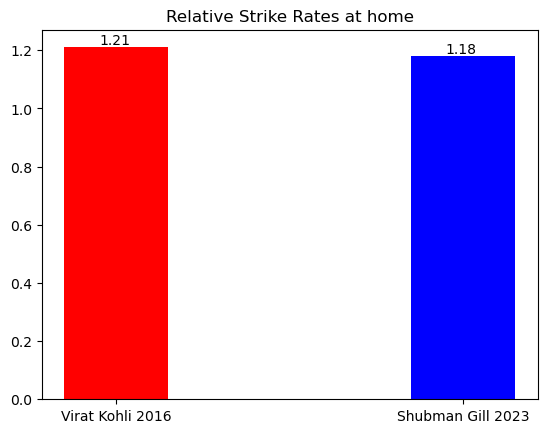

In [132]:
#vdf_home = virat's data frame for matches played in BLR
#sdf_home = virat's data frame for matches played in AHM

vdf_home = vdf[vdf["venue"] == "M Chinnaswamy Stadium"]
sdf_home = sdf[sdf["venue"] == "Narendra Modi Stadium, Ahmedabad"]

#calculating mean runs and strike rates
vdf_home_rpi = sum(vdf_home["runs_off_bat"]) / 9
sdf_home_rpi = sum(sdf_home["runs_off_bat"]) / 9
vdf_home_sr = sum(vdf_home["runs_off_bat"]) / len(vdf_home)
sdf_home_sr = sum(sdf_home["runs_off_bat"]) / len(sdf_home)

#data frames for rest of the batters in BLR and AHM
df_notkohli_blr = df_notkohli[df_notkohli["venue"] == "M Chinnaswamy Stadium"]
df_notshubman_ahm = df_notshubman[df_notshubman["venue"] == "Narendra Modi Stadium, Ahmedabad"]

df_notshubman_ahm_sr = df_notshubman_ahm["runs_off_bat"].sum() / len(df_notshubman_ahm)
df_notkohli_blr_sr = df_notkohli_blr["runs_off_bat"].sum() / len(df_notkohli_blr)

#getting the data ready for plotting
home_sr_ratios = [round(sdf_home_sr / df_notshubman_ahm_sr, 2), round(vdf_home_sr / df_notkohli_blr_sr,2)]

c=['red','blue']
plt.bar(players,home_sr_ratios,color=c,width=0.3)
plt.title("Relative Strike Rates at home")

for i, v in enumerate(home_sr_ratios):
    plt.text(i-0.05,v+0.01,str(v))
    
plt.show()

# 9) Mean runs (not average) scored at home

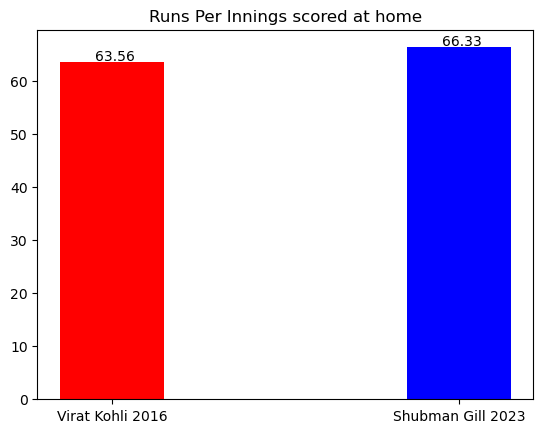

In [133]:
vdf_home_rpi = sum(vdf_home["runs_off_bat"]) / 9
sdf_home_rpi = sum(sdf_home["runs_off_bat"]) / 9

home_rpi_ratios = [round(sum(sdf_home["runs_off_bat"]) / 9, 2), round(sum(vdf_home["runs_off_bat"]) / 9,2)]

c=['red','blue']
plt.bar(players,home_rpi_ratios,color=c,width=0.3)
plt.title("Runs Per Innings scored at home")

for i, v in enumerate(home_rpi_ratios):
    plt.text(i-0.05,v+0.38,str(v))
    
plt.show()

# Short Conclusion 

In [134]:
# The parameters used for comparison in this project were:
# 1) Strike rates by phases
# 2) Ratios of their strike rates when compared with other batter's strike rates
# 3) Ratios of their strike rates when compared with other batter's strike rates - by phases
# 4) Strike rates against top three wicket takers of their respective seasons
# 5) Percentage of team's runs scored
# 6) Dot balls percentage
# 7) Mean runs scored in different innings
# 8) Ratios of their strike rates when compared with other batter's strike rates - at home
# 9) Mean runs scored at home

# Notably, Shubman Gill's 2023 IPL season stands at par with that of Virat Kohli's in 2016 as per our statistical model.

# The evident difference between their performances, however, was the latter's juggernaut batting in the slog overs
# where he went at 241.18 while the former to managed to strike at an underpar 190.48.

# And as we were able to conclude from the model, both players had a minimal difference in their performances based on different
# parameters barring their strike rates in the slog overs.

# Understandably, Shubman Gill will be looking to work on his batting in the slog overs if he persuits to reach the
#standards set by Virat Kohli.